<a href="https://colab.research.google.com/github/vijipandian/project/blob/main/European_Housing_Price_2022_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
data=pd.read_csv("/content/european_housing_prices_clean.csv")
data.head(2)

,country,country_type,eu_member,eurozone_member,year,quarter_num,quarter,price_index,quarterly_change_pct,yearly_change_pct,price_change_since_2015_pct,data_quality
0,Austria,Individual,Yes,Yes,2022,4,2022-Q4,166.32,-4.2,5.7,66.32,Complete
1,Austria,Individual,Yes,Yes,2023,1,2023-Q1,164.35,-1.2,-0.2,64.35,Complete


In [70]:
data.shape

(417, 12)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      417 non-null    object 
 1   country_type                 417 non-null    object 
 2   eu_member                    357 non-null    object 
 3   eurozone_member              357 non-null    object 
 4   year                         417 non-null    int64  
 5   quarter_num                  417 non-null    int64  
 6   quarter                      417 non-null    object 
 7   price_index                  405 non-null    float64
 8   quarterly_change_pct         417 non-null    float64
 9   yearly_change_pct            417 non-null    float64
 10  price_change_since_2015_pct  405 non-null    float64
 11  data_quality                 417 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 39.2+ KB


In [73]:
data.isnull().sum()

,0
country,0
country_type,0
eu_member,60
eurozone_member,60
year,0
quarter_num,0
quarter,0
price_index,12
quarterly_change_pct,0
yearly_change_pct,0


In [74]:
#check null values.
data['eu_member'].isnull().sum()
data.head(2)

,country,country_type,eu_member,eurozone_member,year,quarter_num,quarter,price_index,quarterly_change_pct,yearly_change_pct,price_change_since_2015_pct,data_quality
0,Austria,Individual,Yes,Yes,2022,4,2022-Q4,166.32,-4.2,5.7,66.32,Complete
1,Austria,Individual,Yes,Yes,2023,1,2023-Q1,164.35,-1.2,-0.2,64.35,Complete


**Categorical Values**

In [ ]:
data['eu_member']=data['eu_member'].map({"Yes":1,"No":0})
data['eu_member']

In [85]:
data["eu_member"]=data["eu_member"].fillna(data["eu_member"].mode()[0])

In [89]:
data['eurozone_member']=data['eurozone_member'].map({"Yes":1,"No":0})
data['eurozone_member']

,eurozone_member
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
412,0.0
413,0.0
414,0.0
415,0.0


In [90]:
data['eurozone_member']=data['eurozone_member'].fillna(data['eurozone_member'].mode()[0])

**Numerical values**

In [91]:
data['price_change_since_2015_pct']=data['price_change_since_2015_pct'].fillna(data['price_change_since_2015_pct'].median())

In [92]:
data['price_index']=data['price_index'].fillna(data['price_index'].median())

In [94]:
#check duplicates.
data.duplicated().sum()

np.int64(0)

In [95]:
data.describe()

,eurozone_member,year,quarter_num,price_index,quarterly_change_pct,yearly_change_pct,price_change_since_2015_pct
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,0.690647,2023.741007,2.503597,200.217314,1.276499,6.317506,100.217314
std,0.462782,0.922513,1.120444,189.666760,2.698651,14.530613,189.666760
min,0.000000,2022.000000,1.000000,98.280000,-6.600000,-14.500000,-1.720000
25%,0.000000,2023.000000,2.000000,146.390000,-0.100000,1.100000,46.390000
50%,1.000000,2024.000000,3.000000,164.250000,1.200000,4.700000,64.250000
75%,1.000000,2024.000000,4.000000,202.190000,2.400000,8.400000,102.190000
max,1.000000,2025.000000,4.000000,1884.940000,22.700000,170.500000,1784.940000


**EDA**

In [ ]:
qua=data.groupby("quarter")["price_index"].mean().sort_values()
qua

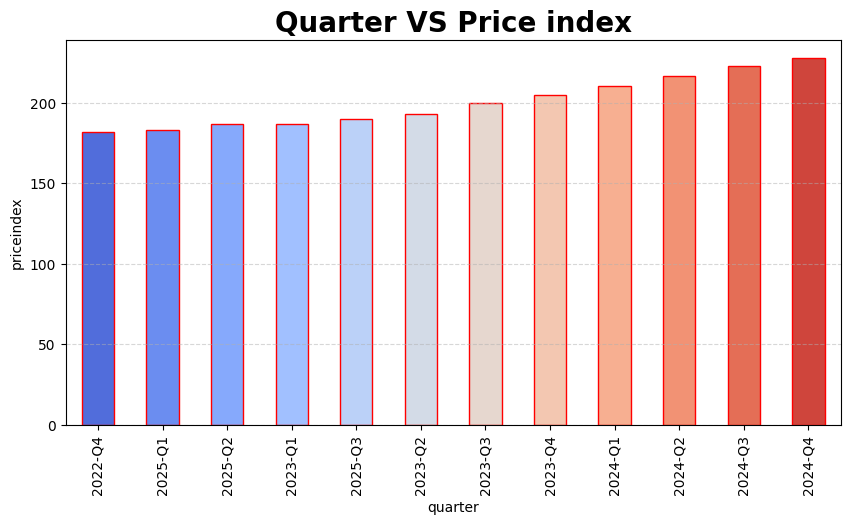

In [97]:
plt.figure(figsize=(10,5))
colors=sns.color_palette("coolwarm",len(qua))
qua.plot(kind="bar",color=colors,edgecolor="red")
plt.title("Quarter VS Price index",fontsize=20,fontweight="bold")
plt.xlabel("quarter")
plt.ylabel("priceindex")
plt.grid(axis="y",linestyle="--",alpha=0.5)
plt.show()

In [98]:
cou=data.groupby("country")["price_index"].mean().sort_values()
cou

,price_index
country,
Finland,102.546667
Italy,111.116667
France,128.808333
Sweden,132.390833
Belgium,139.400000
Cyprus,140.374167
Denmark,142.819167
"Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023, EA21-2026)",146.496667
Euro area – 20 countries (2023-2025),146.688333


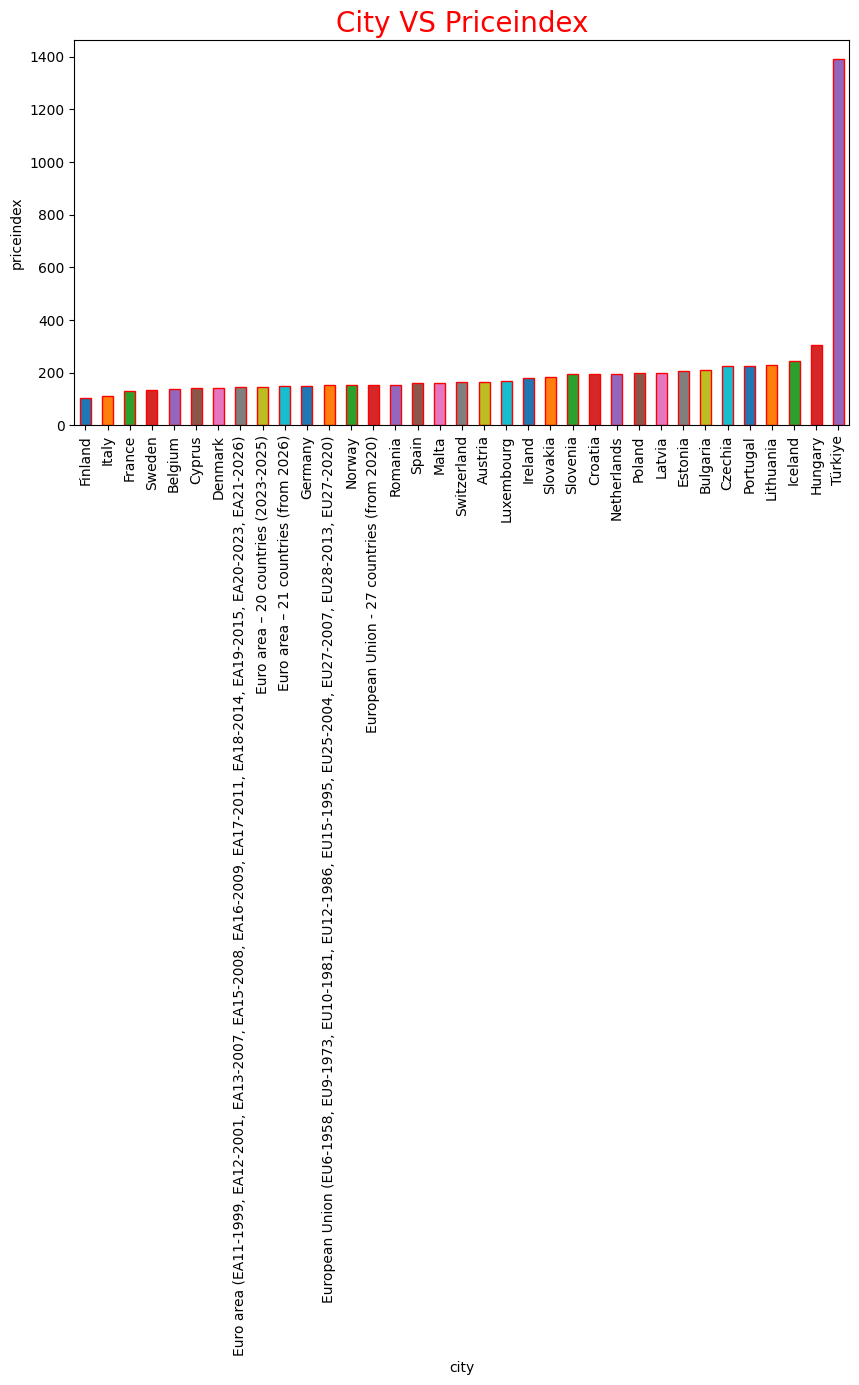

In [135]:
plt.figure(figsize=(10,5))
colors=sns.color_palette("tab10",len(cou))
cou.plot(kind="bar",color=colors,edgecolor="red")
plt.title("City VS Priceindex",fontsize=20,color="red")
plt.xlabel("city")
plt.ylabel("priceindex")
plt.show()


In [100]:
data['quarterly_change_pct'].corr(data['price_index'])

np.float64(0.557952411310188)

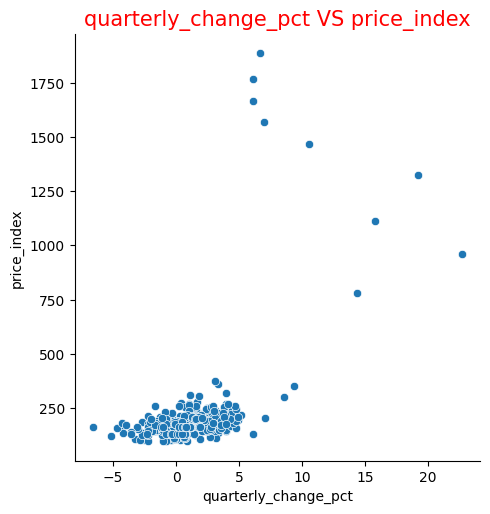

In [136]:
sns.relplot(x="quarterly_change_pct",y="price_index",data=data)
plt.title("quarterly_change_pct VS price_index",fontsize=15,color="red")
plt.show()

**ML**

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x=data[["year","quarter_num","quarterly_change_pct","yearly_change_pct"]]
y=data['price_index']

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [140]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(333, 4)
(84, 4)
(333,)
(84,)


In [141]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [142]:
model=RandomForestRegressor(
     n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, random_state=42)

In [143]:
ra_prd=model.predict(x_test)

In [144]:
ra_r2=(r2_score(y_test,ra_prd))
print("RandomForest R2_score:", ra_r2)

RandomForest R2_score: 0.8656159469354944


In [145]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [146]:
model1=DecisionTreeRegressor(random_state=42)
model1.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [147]:
de_pre=model1.predict(x_test)

In [148]:
de_r2=r2_score(y_test, de_pre)
print("DecisionTree R2_score:", de_r2)

DecisionTree R2_score: 0.9218252043875176


In [149]:
score=pd.DataFrame({
    "Model":["DecisionTree Regressor","RandomForest Regressor"],
    "R2 Score":[ra_r2,de_r2]
})

print(score)

                    Model  R2 Score
0  DecisionTree Regressor  0.865616
1  RandomForest Regressor  0.921825


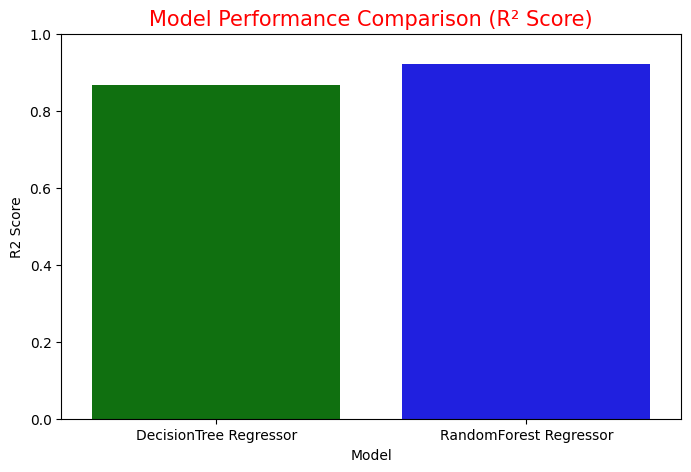

In [150]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model",y="R2 Score",data=score,palette=["green","blue"],hue="Model",legend=False)
plt.title("Model Performance Comparison (R² Score)",color="red",fontsize=15)
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.ylim(0,1)
plt.show()